In [9]:
import random
import numpy as np
import json
from tqdm import tqdm
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import linear_sum_assignment
from collections import Counter
import time
import os
import pandas as pd
from scipy.signal import correlate
import matplotlib.pyplot as plt
import seaborn as sns
np. set_printoptions(threshold=np. inf)

In [3]:
params = {
    'M':4,
    'N':100,
    'D':101,
    'T':5000,
    'seed':1,
    'SM_repetitions':2,
    'spikes_in_SM':20,
    'noise':1000
}
M,N,D,T,seed,SM_repetitions,spikes_in_SM,noies = params.values()

In [16]:
import simulate_data
import scan
palette = simulate_data.create_palette()

In [5]:
A_dense, A_sparse, B_dense, B_sparse, K_dense, K_sparse = simulate_data.generate_synthetic_data(params,plot=False)

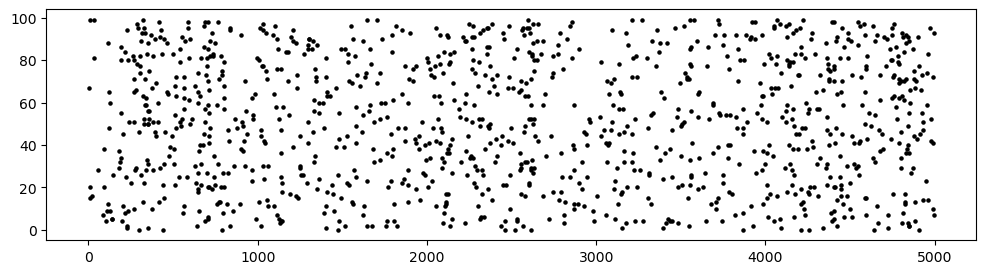

In [23]:
plt.figure(figsize=(12,3))
plt.scatter(A_sparse[1], A_sparse[0],c='black',s=5)
plt.show()

In [7]:
K_dense.shape

(100, 101, 4)

In [14]:
palette = sns.color_palette('bright')

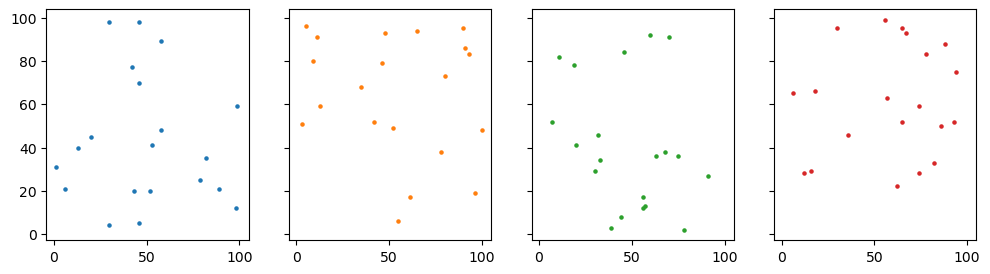

In [18]:
fig,ax = plt.subplots(1,4,figsize=(12,3),sharey='row',sharex='row')
for i in range(4):
    ax[i].scatter(np.where(K_dense[...,i])[1],np.where(K_dense[...,i])[0],c=palette[i+1],s=5)
plt.show()

In [34]:
sanity_check = np.zeros((T,M))
for j in range(M):
    for i in range(T-D):
        sanity_check[i,j] = np.sum(K_dense[...,j]*A_dense[:,i:i+D])
    sanity_check[:,j] = sanity_check[:,j]/np.max(sanity_check[:,j])

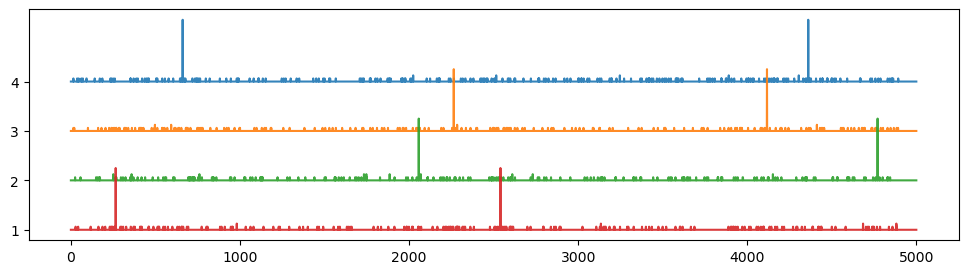

In [35]:
# ['SM 1', 'SM 2', 'SM 3', 'SM 4']
plt.figure(figsize=(12,3))
for i in range(4):
    plt.plot(sanity_check[:,i]+4*0.8-i*0.8,alpha=0.9)
plt.yticks([0.8,1.6,2.4,3.2],labels = ['1', '2', '3', '4'])
plt.show()

# Let's put it all together!

In [78]:
import matplotlib.transforms as mtransforms

In [51]:
ax['A']

AttributeError: 'Axes' object has no attribute 'xlabels'

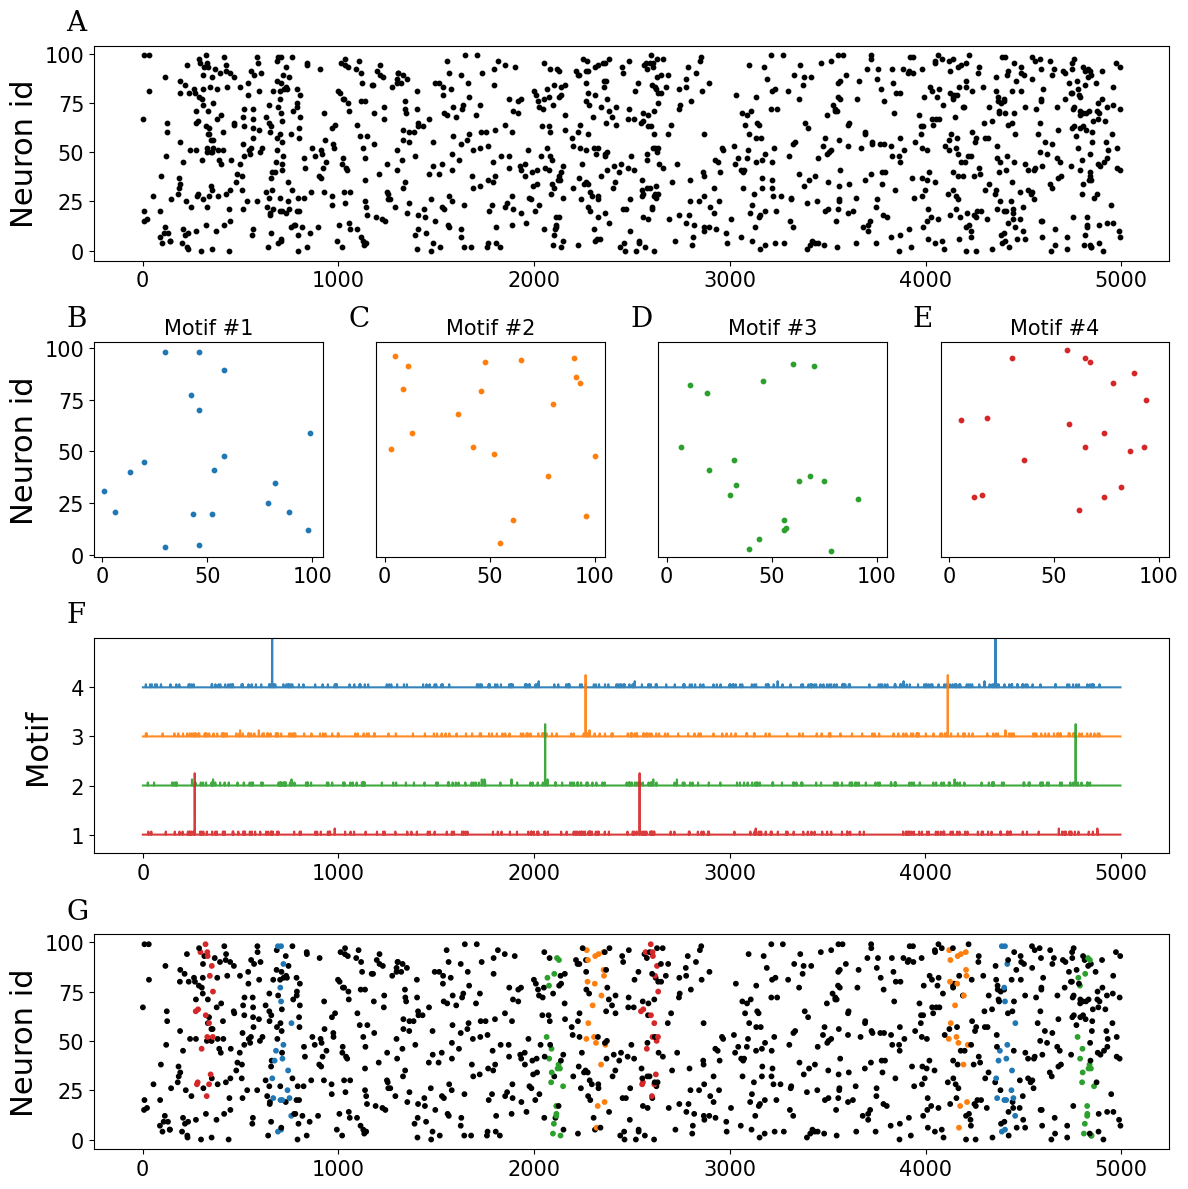

In [80]:
s=10
fig,ax = plt.subplot_mosaic('AAAA;BCDE;FFFF;GGGG',figsize=(12,12))
ax['A'].scatter(A_sparse[1], A_sparse[0],c='black', s=s)
ax['A'].tick_params(axis='y',labelsize=15)
ax['A'].tick_params(axis='x',labelsize=15)
ax['A'].set_ylabel('Neuron id', fontsize=22)

axs = ['B','C','D','E']
for i in range(4):
    ax[axs[i]].scatter(np.where(K_dense[...,i])[1],np.where(K_dense[...,i])[0],c=palette[i+1],s=s)
    ax[axs[i]].set_title(f'Motif #{i+1}',fontsize=15)
    ax[axs[i]].tick_params(axis='x',labelsize=15)
    
    if i !=0:
        ax[axs[i]].sharex(ax['B'])
        ax[axs[i]].sharey(ax['B'])
        ax[axs[i]].tick_params(left = False, right = False , labelleft = False)
ax['B'].tick_params(axis='y',labelsize=15)
ax['B'].set_ylabel('Neuron id', fontsize=22)
    
for i in range(4):
    ax['F'].plot(sanity_check[:,i]+4*0.8-i*0.8,alpha=0.9)
ax['F'].set_yticks([0.8,1.6,2.4,3.2],labels = ['  1', '  2', '  3', '  4'])
ax['F'].tick_params(axis='y',labelsize=15)
ax['F'].tick_params(axis='x',labelsize=15)
ax['F'].set_ylabel('Motif', fontsize=22)
ax['F'].set_ylim(0.5,4)

ax['G'].scatter(A_sparse[1], A_sparse[0],c=palette[A_sparse[2]], s=s)
ax['G'].tick_params(axis='y',labelsize=15)
ax['G'].tick_params(axis='x',labelsize=15)
ax['G'].set_ylabel('Neuron id', fontsize=22)

for label, ax in ax.items():
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize=20, va='bottom', fontfamily='serif')
    
fig.tight_layout()

In [35]:
np.array([len(A_sparse[0][A_sparse[0]==n]) for n in np.unique(A_sparse[0])])/5

array([2.4, 1.6, 3.4, 2. , 4. , 2.6, 1.4, 2. , 1.6, 1.6, 1.6, 2.4, 3.2,
       2.6, 1.4, 2. , 1.8, 2.6, 1.8, 2. , 3.4, 3.2, 2.4, 1.2, 0.8, 2.6,
       2.8, 2.2, 3.2, 2.8, 1.8, 2.4, 2.6, 1.2, 2. , 2. , 2.4, 1.6, 3. ,
       1.4, 2.8, 3.4, 2. , 1.4, 2.8, 2.8, 2. , 1.8, 3.4, 2.2, 1.6, 3.6,
       4.4, 1.6, 1.8, 2.2, 1.4, 2.4, 0.8, 3.2, 2.6, 1.2, 1.4, 2.6, 2.4,
       2.6, 1.2, 2.2, 1.4, 1.8, 3. , 2.8, 2.8, 2.8, 2. , 1.2, 2.2, 3.2,
       2.2, 2. , 2.4, 3.2, 3. , 3.2, 1.8, 3. , 1.8, 1.2, 2. , 3.2, 3. ,
       2.8, 3.2, 3. , 2.2, 3.4, 2.4, 2.2, 2.2, 2.6])